# MOwNiT 
## Laboratorium
### Znajdowanie pierwiastków

Do poszukiwania pierwiastków funkcji w Julii używamy pakietu Roots

```julia
Pkg.add("Roots")
Pkg.add("ForwardDiff")
```

In [1]:
using Pkg
#Pkg.add("Roots")
#Pkg.add("ForwardDiff")
using Roots  
using Plots
using ForwardDiff
using DataFrames

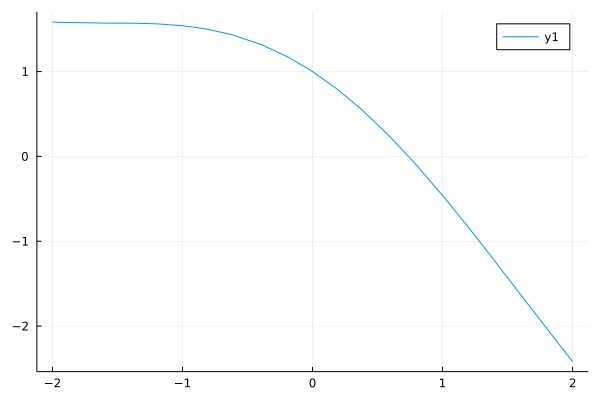

In [2]:
# przykładowa funkcja do testów
f(x) = cos(x) - x
plot(f, -2, 2)

Funkcja <i> find_zero</i>  dobiera odpowiedni algorytm w zależności od sposobu wywołania.


### 1. Metody wykorzytujące  przedział i zmianę znaku

#### 1.1 Metoda bisekcji - jesli wywołamy fzero z podaniem  przedziału (tutaj (0,1))

In [3]:
x = find_zero(f, (0, 1),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Bisection()
* iterations: 60
* function evaluations ≈ 63
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 1.118751109680031e-154, 1 )
(a₁, b₁) = ( 1.0795210693868056e-77, 1 )
(a₂, b₂) = ( 3.3060778616876836e-39, 1 )
(a₃, b₃) = ( 5.7598240413292423e-20, 1 )
(a₄, b₄) = ( 2.4010660126805305e-10, 1 )
(a₅, b₅) = ( 1.5497207641601562e-05, 1 )
(a₆, b₆) = ( 0.003936767578125, 1 )
(a₇, b₇) = ( 0.062744140625, 1 )
(a₈, b₈) = ( 0.25048828125, 1 )
(a₉, b₉) = ( 0.50048828125, 1 )
(a₁₀, b₁₀) = ( 0.50048828125, 0.750244140625 )
(a₁₁, b₁₁) = ( 0.6253662109375, 0.750244140625 )
(a₁₂, b₁₂) = ( 0.68780517578125, 0.750244140625 )
(a₁₃, b₁₃) = ( 0.719024658203125, 0.750244140625 )
(a₁₄, b₁₄) = ( 0.7346343994140625, 0.750244140625 )
(a₁₅, b₁₅) = ( 0.7346343994140625, 0.74243927001953125 )
(a₁₆, b₁₆) = ( 0.73853683471679688, 0.74243927001953125 )
(a₁₇, b₁₇) = ( 0.73853683471679688, 0.74048805236816406 )
(a₁₈, b₁₈) = ( 0.73853683

0.7390851332151607

In [4]:
# mozna wyspecyfikowac wprost
x = find_zero(f, (0, 1), Bisection(),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Bisection()
* iterations: 60
* function evaluations ≈ 63
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 1.118751109680031e-154, 1 )
(a₁, b₁) = ( 1.0795210693868056e-77, 1 )
(a₂, b₂) = ( 3.3060778616876836e-39, 1 )
(a₃, b₃) = ( 5.7598240413292423e-20, 1 )
(a₄, b₄) = ( 2.4010660126805305e-10, 1 )
(a₅, b₅) = ( 1.5497207641601562e-05, 1 )
(a₆, b₆) = ( 0.003936767578125, 1 )
(a₇, b₇) = ( 0.062744140625, 1 )
(a₈, b₈) = ( 0.25048828125, 1 )
(a₉, b₉) = ( 0.50048828125, 1 )
(a₁₀, b₁₀) = ( 0.50048828125, 0.750244140625 )
(a₁₁, b₁₁) = ( 0.6253662109375, 0.750244140625 )
(a₁₂, b₁₂) = ( 0.68780517578125, 0.750244140625 )
(a₁₃, b₁₃) = ( 0.719024658203125, 0.750244140625 )
(a₁₄, b₁₄) = ( 0.7346343994140625, 0.750244140625 )
(a₁₅, b₁₅) = ( 0.7346343994140625, 0.74243927001953125 )
(a₁₆, b₁₆) = ( 0.73853683471679688, 0.74243927001953125 )
(a₁₇, b₁₇) = ( 0.73853683471679688, 0.74048805236816406 )
(a₁₈, b₁₈) = ( 0.73853683

0.7390851332151607

#### Sprawdzanie, czy znaleźliśmy 0

In [5]:
#Sprawdzamy czy znaleźliśmy 0
iszero(f(x))

true

In [6]:
# można też sprawdzić, czy funkcja zmienia znak dla lewego i prawego sąsiada miejsca zerowego.
sign(f(prevfloat(x))) *sign(f(nextfloat(x))) 

-1.0

In [7]:
# czasem algorytm znajduje najlepsze przybliżenie 0
g(x) = sin(x)
x = find_zero(g, (pi/2, 3pi/2))
x, g(x)

(3.141592653589793, 1.2246467991473532e-16)

In [8]:
# nie jest to dokładnie 0, ale ...
iszero(g(x))

false

In [9]:
#... najbliższy lewy albo prawy sąsiad leży po przeciwnej stronie osi x  niż nasze 0.
g(prevfloat(x)) * g(x) < 0.0 || g(x) * g(nextfloat(x)) < 0.0

true

#### 1.2 Metoda regula falsi

In [10]:
find_zero(f, (0, 1), FalsePosition(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 6
* function evaluations ≈ 8
* stopped as f(x_n) = 0

Trace:
x₁ = 1.118751109680031e-154,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.68507335732604513,	 fx₃ = 0.089299276481859979
x₄ = 0.73629899761365403,	 fx₄ = 0.0046600390381426049
x₅ = 0.7390895164441823,	 fx₅ = -7.3358319172545094e-06
x₆ = 0.73908513051468816,	 fx₆ = 4.5195431841449363e-09
x₇ = 0.73908513321515801,	 fx₇ = 4.4408920985006262e-15
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

In [11]:
# do dyspozycji mamy  12 wersji algorytmu regula falsi
find_zero(f, (0, 1), FalsePosition(12), verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{12}()
* iterations: 6
* function evaluations ≈ 8
* stopped as f(x_n) = 0

Trace:
x₁ = 1.118751109680031e-154,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.68507335732604513,	 fx₃ = 0.089299276481859979
x₄ = 0.73629899761365403,	 fx₄ = 0.0046600390381426049
x₅ = 0.7390895164441823,	 fx₅ = -7.3358319172545094e-06
x₆ = 0.73908513051468816,	 fx₆ = 4.5195431841449363e-09
x₇ = 0.73908513321515801,	 fx₇ = 4.4408920985006262e-15
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

### 2. Metody korzystające z pochodnych

#### 2.1 Metoda Newtona, potrzebuje punktu startowego i wykorzystuje pochodną funkcji.

Aby użyć Metody Newtona, można skorzystać z pakietu ForwardDiff, aby obliczyć pochodną funkcji. 

In [12]:
# definujemy D(f) obliczającą  funkcje pochodną 
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

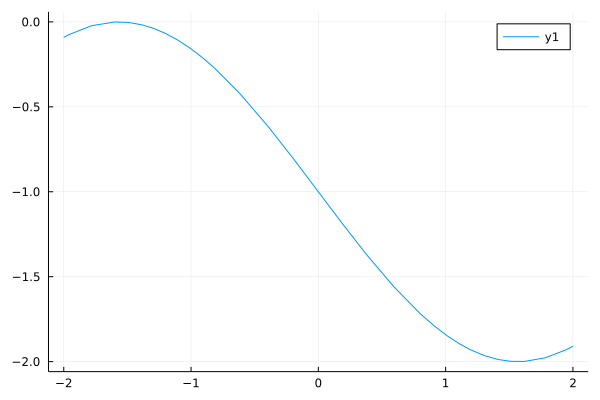

In [13]:
plot(D(f), -2,2)

In [14]:
#wywolanie metody Newtona
find_zero((f, D(f)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.75036386784024389,	 fx₃ = -0.018923073822117442
x₄ = 0.73911289091136168,	 fx₄ = -4.6455898990771516e-05
x₅ = 0.73908513338528403,	 fx₅ = -2.8472058044570758e-10
x₆ = 0.73908513321516067,	 fx₆ = 0



0.7390851332151607

#### 2.2 Metoda Halleya (potrzebuje pierwszej i drugiej pochodnej)

In [15]:
DD(f) = x->ForwardDiff.derivative(D(f), float(x))
find_zero((f, D(f), DD(f)), 0.0, Roots.Halley(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151606
* Algorithm: Roots.Halley()
* iterations: 4
* function evaluations ≈ 15
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = 1
x₂ = 0.66666666666666663,	 fx₂ = 0.11922059411028141
x₃ = 0.73903926244631024,	 fx₃ = 7.6769092960393692e-05
x₄ = 0.73908513321514946,	 fx₄ = 1.865174681370263e-14
x₅ = 0.73908513321516056,	 fx₅ = 1.1102230246251565e-16



0.7390851332151606

### 3. Metody korzystające z przybliżenia pochodnej

#### 3.1 Domyślna metoda bazuje na metodzie z <a href="http://www.hpl.hp.com/hpjournal/pdfs/IssuePDFs/1979-12.pdf"> kalkulatorów HP-34</a> , używa metody siecznych
oraz metody bazującej na przedziale wg artykułu:

<a href="http://na.math.kit.edu/alefeld/download/1995_Algorithm_748_Enclosing_Zeros_of_Continuous_Functions.pdf">G. E. Alefeld, F. A. Potra, and
Y. Shi, "Algorithm 748: enclosing zeros of continuous functions," ACM
Trans. Math. Softw. 21, 327–344 (1995), DOI: 10.1145/210089.210111. </a>

In [16]:
x = find_zero(f, 0,   verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 4
* function evaluations ≈ 10
* stopped as f(x_n) = 0
* Note: Used bracketing method AlefeldPotraShi() on  [0.0,0.9999969722835389]

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
(a₃, b₃) = ( 0, 0.9999969722835389 )
(a₄, b₄) = ( 1.1187488515059306e-154, 0.9999969722835389 )
(a₅, b₅) = ( 0.73848198557107825, 0.73967384145392068 )
(a₆, b₆) = ( 0.73848198557107825, 0.73908513321516067 )



0.7390851332151607

Metody find_zero dla wyzszych rzędów to wariacje metody Newtona, które nie korzystaja z pochodnej, ale ja przyblizają.


#### 3.2 Metoda siecznych

In [17]:
# wywołanie find_zero używając punktu startowego (a nie przedziału) 
# oraz opcji order=1   wykorzystuje metodę siecznych  
x = find_zero(f, 0, Order1(),  verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Secant()
* iterations: 7
* function evaluations ≈ 9
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908511212853889,	 fx₇ = 3.5290823707789798e-08
x₈ = 0.73908513321500136,	 fx₈ = 2.6656454821250009e-13
x₉ = 0.73908513321516067,	 fx₉ = 0



0.7390851332151607

In [18]:
# metoda siecznych może być wywołana bezpośrednio 
# implementacja taka sama jak find_zero(f, 0, Order1()), ale bez
# narzutów frameworku oraz mniejsza ilość sprawdzanych warunków zbieżności - szybsza
Roots.secant_method(f, 0)

0.7390851332151607

In [19]:
# mozemy podać przedział
Roots.secant_method(f, (0,1))

0.7390851332151607

#### 3.3 Metoda Steffensena 
przybliża pochodną poprzez  (f(x + f(x)) - f(x))/f(x)  
aby ja wywołać podajemy punkt startowy oraz order 2

In [20]:
x = find_zero(f, 0, Order2(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order2()
* iterations: 6
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908513304090806,	 fx₇ = 2.9163127468478933e-10
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

In [21]:
# mozliwe sa jeszcze rzędy 5, 8 i 16
x = find_zero(f, 0, Order8(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order8()
* iterations: 5
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908513321516067,	 fx₇ = 0



0.7390851332151607

Można użyć funkcji fzero do znajdowania nieciagłości

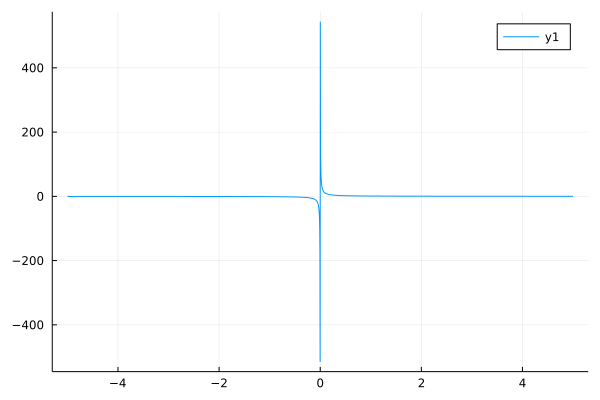

In [22]:
plot(x -> 1/x)

In [23]:
find_zero(x -> 1/x, (-1, 1), verbose=true)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 61
* function evaluations ≈ 64
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol

Trace:
(a₀, b₀) = ( -1, 0 )
(a₁, b₁) = ( -1.118751109680031e-154, 0 )
(a₂, b₂) = ( -1.1272010346794983e-231, 0 )
(a₃, b₃) = ( -3.5491565585003241e-270, 0 )
(a₄, b₄) = ( -1.988135013128901e-289, 0 )
(a₅, b₅) = ( -4.7036486372562232e-299, 0 )
(a₆, b₆) = ( -7.2341601287786131e-304, 0 )
(a₇, b₇) = ( -2.8369691695966818e-306, 0 )
(a₈, b₈) = ( -1.7765824089018436e-307, 0 )
(a₉, b₉) = ( -4.4458018696345059e-308, 0 )
(a₁₀, b₁₀) = ( -2.2229009348172529e-308, 0 )
(a₁₁, b₁₁) = ( -1.1114504674086265e-308, 0 )
(a₁₂, b₁₂) = ( -5.5572523370431324e-309, 0 )
(a₁₃, b₁₃) = ( -2.7786261685215662e-309, 0 )
(a₁₄, b₁₄) = ( -1.3893130842607831e-309, 0 )
(a₁₅, b₁₅) = ( -6.9465654213039155e-310, 0 )
(a₁₆, b₁₆) = ( -3.4732827106519577e-310, 0 )
(a₁₇, b₁₇) = ( -1.7366413553259789e-310, 0 )
(a₁₈, b₁₈) = ( -8.6832067766298943e-311, 0 

0.0

find_zeros - szukanie więcej niż jednego pierwiastka. Wykorzystuje podział przedziału na mniejsze podprzedziały

In [24]:
find_zeros(x ->(x-3)*x, -10, 10)

2-element Vector{Float64}:
 0.0
 3.0

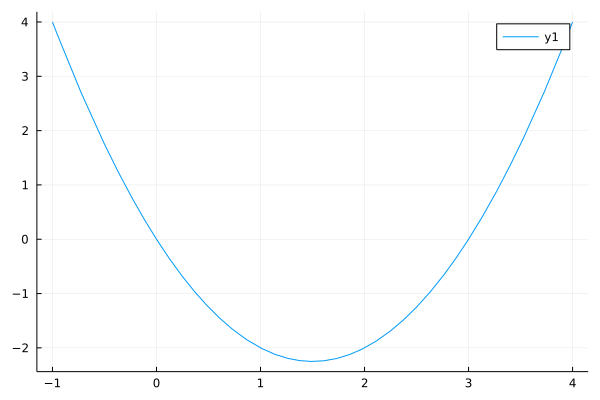

In [25]:
plot(x ->(x-3)*x,-1,4)

Więcej na https://docs.juliahub.com/Roots/o0Xsi/2.0.0/roots/

Wyciąganie informacji z przebiegu działania funkcji: https://docs.juliahub.com/Roots/o0Xsi/2.0.0/reference/#Tracking-iterations

### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

    1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

    2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

    3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

B. Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

# A
### 1.

In [3]:
D(f) = x->ForwardDiff.derivative(f, float(x))
# bisection = find_zero(f,(from, to), Bisection(),verbose=true)      # METAO BIESKCJI   - Wykorzystuje przedzial i zmiana znaku
# newton = find_zero((f, D(f1)), from, Roots.Newton(),verbose=true)  # METODA NEWTONA   - Wykorzystuje pochodną
# secant = find_zero(f, from, Roots.Secant(), verbose = true)        # METODA SIECZNYCH - Wykorzystuje przyblizenie pochodnej

f1(x) = sin(x) - x / 2  # [-4,4]
f2(x) = 2 * x - exp(-x) # [-0.5,3.0]
f3(x) = x * exp(-x)     # [-0.1,4]
f4(x) = cos(x) - x      # [-4, 4]
f5(x) = 0.00000000001 * (x - 100.0) #[0,100] - The Lazy Boy
f6(x) = ( 16.0 - x^4 ) / ( 16.0 * x^4 + 0.00001 ) # [1,10] The Pinhead

data_frame = DataFrame(
    func = String[],
    method = String[], 
    no_iterations = Int64[],
    no_func_evals = Int64[],
    res_x = Float64[],
    res_y = Float64[],
    is_zero = Bool[],
    sign_diff = Float64[]
)

,func,method,no_iterations,no_func_evals,res_x,res_y,is_zero,sign_diff
,String,String,Int64,Int64,Float64,Float64,Bool,Float64


### f1(x)

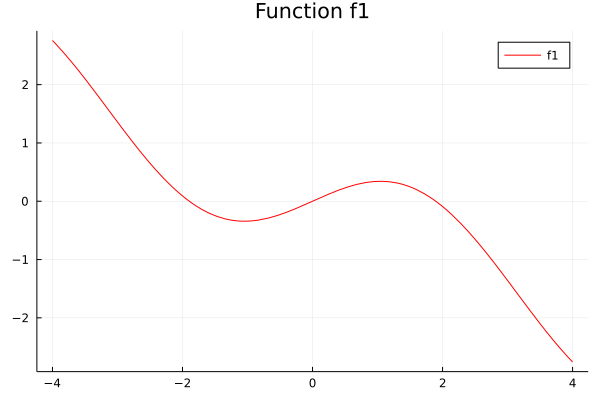

In [4]:
from = -4
to = 4
plot(f1, from, to, title="Function f1", label = "f1", color = "red")

In [7]:
bisection = find_zero(f1,(from, to), Bisection(),verbose=true)
newton = find_zero((f1, D(f1)), from, Roots.Newton(),verbose=true)
secant = find_zero(f1, from, Roots.Secant(), verbose = true)  

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 4 )



Results of univariate zero finding:

* Converged to: -1.895494267033981
* Algorithm: Roots.Newton()
* iterations: 6
* function evaluations ≈ 12
* stopped as f(x_n) = 0

Trace:
x₁ = -4,	 fx₁ = 2.7568024953079284
x₂ = -1.6103517191520549,	 fx₂ = -0.19404192788905972
x₃ = -1.9699916004393636,	 fx₃ = 0.06362172927963472
x₄ = -1.8984000905205811,	 fx₄ = 0.0023839348777178193
x₅ = -1.8954991329401036,	 fx₅ = 3.9852979347720918e-06
x₆ = -1.89549426704768,	 fx₆ = 1.1219802864559369e-11
x₇ = -1.8954942670339809,	 fx₇ = 0



Results of univariate zero finding:

* Converged to: -1.895494267033981
* Algorithm: Secant()
* iterations: 8
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = -3.9999939443988737,	 fx₁ = 2.7567955092884424
x₂ = -4,	 fx₂ = 2.7568024953079284
x₃ = -1.6103564656441494,	 fx₃ = -0.19403936693135537
x₄ = -1.7674929508389685,	 fx₄ = -0.096971033336879287
x₅ = -1.924471924104602,	 fx₅ = 0.024129946088460641
x₆ = -1.8931931171131449,	 fx₆ = -0.0018821836713925899
x₇ = -1.8954563866079335,	 fx₇ = -3.1024242180266448e-05
x₈ = -1.8954943175499244,	 fx₈ = 4.1373696690882866e-08
x₉ = -1.8954942670328738,	 fx₉ = -9.0671914421136535e-13
x₁₀ = -1.8954942670339809,	 fx₁₀ = 0



-1.895494267033981

In [6]:
root = bisection
if(root != NaN)
    println("BISECTION:")
    println("root is: ",root)
    println("f1(x): ",f1(root))
    println("iszero: ",iszero(f1(root)))
    println("sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): ", sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))))
end    

println()

root = newton
if(root != NaN)
    println("NEWTON:")
    println("root is: ",root)
    println("f1(x): ",f1(root))
    println("iszero: ",iszero(f1(root)))
    println("sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): ", sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))))
end        
        
println()

root = secant
if(root != NaN)
    println("SECANT:")
    println("root is: ",root)
    println("f(x): ",f1(root))
    println("iszero: ",iszero(f1(root)))
    println("sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): ", sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))))
end  

BISECTION:
root is: 0.0
f1(x): 0.0
iszero: true
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -1.0

NEWTON:
root is: -1.895494267033981
f1(x): 0.0
iszero: true
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -1.0

SECANT:
root is: -1.895494267033981
f(x): 0.0
iszero: true
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -1.0


In [20]:
push!(data_frame, ["f1", "Bisection", 0 , 3, 0.0, 0.0, true, -1.0])
push!(data_frame, ["f1", "Newton", 6 , 12, -1.895494267033981, 0.0, true, -1.0])
push!(data_frame, ["f1", "Secant", 8 , 10, -1.895494267033981, 0.0, true, -1.0])

,func,method,no_iterations,no_func_evals,res_x,res_y,is_zero
,String,String,Int64,Int64,Float64,Float64,Bool
1,f2,Bisection,61,64,0.351734,0.0,1
2,f2,Newton,5,10,0.351734,0.0,1
3,f2,Secant,6,8,0.351734,-1.11022e-16,0
4,f1,Bisection,0,3,0.0,0.0,1
5,f1,Newton,6,12,-1.89549,0.0,1
6,f1,Secant,8,10,-1.89549,0.0,1


### f2(x)

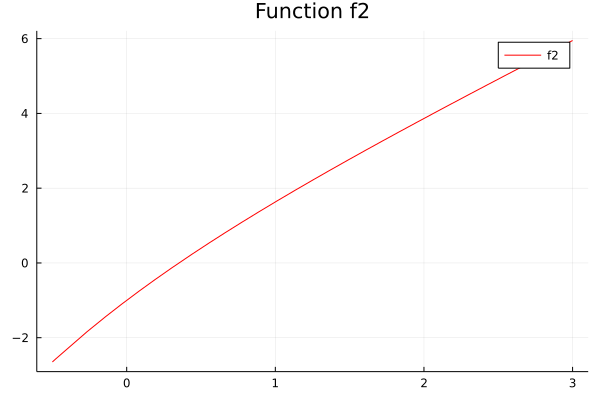

In [8]:
from = -0.5
to = 3
plot(f2, from, to, title="Function f2", label = "f2", color = "red")

In [9]:
bisection = find_zero(f2,(from, to), Bisection(),verbose=true)
newton = find_zero((f2, D(f2)), from, Roots.Newton(),verbose=true)
secant = find_zero(f2, from, Roots.Secant(), verbose = true)  

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Bisection()
* iterations: 61
* function evaluations ≈ 64
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 3 )
(a₁, b₁) = ( 1.8645851828000517e-154, 3 )
(a₂, b₂) = ( 2.3749463526509723e-77, 3 )
(a₃, b₃) = ( 8.4488656465351915e-39, 3 )
(a₄, b₄) = ( 1.5924219408380846e-19, 3 )
(a₅, b₅) = ( 6.9121597334742546e-10, 3 )
(a₆, b₆) = ( 4.5537948608398438e-05, 3 )
(a₇, b₇) = ( 0.011688232421875, 3 )
(a₈, b₈) = ( 0.187255859375, 3 )
(a₉, b₉) = ( 0.187255859375, 0.74951171875 )
(a₁₀, b₁₀) = ( 0.187255859375, 0.3746337890625 )
(a₁₁, b₁₁) = ( 0.249786376953125, 0.3746337890625 )
(a₁₂, b₁₂) = ( 0.312103271484375, 0.3746337890625 )
(a₁₃, b₁₃) = ( 0.3433685302734375, 0.3746337890625 )
(a₁₄, b₁₄) = ( 0.3433685302734375, 0.35900115966796875 )
(a₁₅, b₁₅) = ( 0.35118484497070312, 0.35900115966796875 )
(a₁₆, b₁₆) = ( 0.35118484497070312, 0.35509300231933594 )
(a₁₇, b₁₇) = ( 0.35118484497070312, 0.35313892364501953 )
(a₁₈, b

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = -0.5,	 fx₁ = -2.6487212707001282
x₂ = 0.22593138093880305,	 fx₂ = -0.3459100803334052
x₃ = 0.34956903840496134,	 fx₃ = -0.0058537718614606327
x₄ = 0.35173310106723366,	 fx₄ = -1.6496071875149454e-06
x₅ = 0.35173371124914737,	 fx₅ = -1.3100631690576847e-13
x₆ = 0.35173371124919584,	 fx₆ = 0



Results of univariate zero finding:

* Converged to: 0.3517337112491958
* Algorithm: Secant()
* iterations: 6
* function evaluations ≈ 8
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -0.49999394452721335,	 fx₁ = -2.6486991759979954
x₂ = -0.5,	 fx₂ = -2.6487212707001282
x₃ = 0.22593237409398181,	 fx₃ = -0.34590730171121142
x₄ = 0.33497518524989744,	 fx₄ = -0.045405467008861056
x₅ = 0.35145142330480827,	 fx₅ = -0.00076318429247590469
x₆ = 0.35173309362535365,	 fx₆ = -1.669726070852029e-06
x₇ = 0.35173371122651109,	 fx₇ = -6.1327387612664097e-11
x₈ = 0.35173371124919578,	 fx₈ = -1.1102230246251565e-16



0.3517337112491958

In [10]:
root = bisection
if(root != NaN)
    println("BISECTION:")
    println("root is: ",root)
    println("f2(x): ",f2(root))
    println("iszero: ",iszero(f2(root)))
    println("sign(f2(prevfloat(root))) * sign(f2(nextfloat(root))): ", sign(f2(prevfloat(root))) * sign(f2(nextfloat(root))))
end    

println()

root = newton
if(root != NaN)
    println("NEWTON:")
    println("root is: ",root)
    println("f2(x): ",f2(root))
    println("iszero: ",iszero(f2(root)))
    println("sign(f2(prevfloat(root))) * sign(f2(nextfloat(root))): ", sign(f2(prevfloat(root))) * sign(f2(nextfloat(root))))
end        
        
println()

root = secant
if(root != NaN)
    println("SECANT:")
    println("root is: ",root)
    println("f2(x): ",f2(root))
    println("iszero: ",iszero(f2(root)))
    println("sign(f2(prevfloat(root))) * sign(f2(nextfloat(root))): ", sign(f2(prevfloat(root))) * sign(f2(nextfloat(root))))
end  

BISECTION:
root is: 0.35173371124919584
f2(x): 0.0
iszero: true
sign(f2(prevfloat(root))) * sign(f2(nextfloat(root))): -1.0

NEWTON:
root is: 0.35173371124919584
f2(x): 0.0
iszero: true
sign(f2(prevfloat(root))) * sign(f2(nextfloat(root))): -1.0

SECANT:
root is: 0.3517337112491958
f2(x): -1.1102230246251565e-16
iszero: false
sign(f2(prevfloat(root))) * sign(f2(nextfloat(root))): -0.0


In [11]:
push!(data_frame, ["f2", "Bisection", 61 , 64, 0.35173371124919584, 0.0, true, -1.0])
push!(data_frame, ["f2", "Newton", 5 , 10, .35173371124919584, 0.0, true, -1.0])
push!(data_frame, ["f2", "Secant", 6 , 8, 0.3517337112491958, -1.1102230246251565e-16, false, -0.0])

,func,method,no_iterations,no_func_evals,res_x,res_y,is_zero
,String,String,Int64,Int64,Float64,Float64,Bool
1,f2,Bisection,61,64,0.351734,0.0,1
2,f2,Newton,5,10,0.351734,0.0,1
3,f2,Secant,6,8,0.351734,-1.11022e-16,0


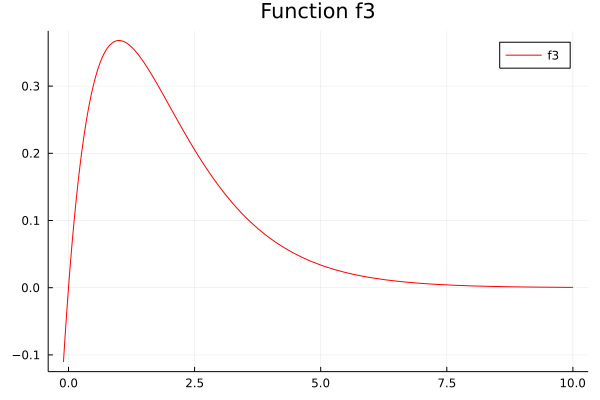

In [17]:
from = -0.1
to = 10
plot(f3, from, to, title="Function f3", label = "f3", color = "red")

In [18]:
bisection = find_zero(f3,(from, to), Bisection(),verbose=true)
newton = find_zero((f3, D(f3)), from, Roots.Newton(),verbose=true)
secant = find_zero(f3, from, Roots.Secant(), verbose = true)  

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 10 )



Results of univariate zero finding:

* Converged to: -4.498484366669896e-17
* Algorithm: Roots.Newton()
* iterations: 4
* function evaluations ≈ 8
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -0.10000000000000001,	 fx₁ = -0.11051709180756478
x₂ = -0.0090909090909090939,	 fx₂ = -0.0091739305173563594
x₃ = -8.1900081900081537e-05,	 fx₃ = -8.1906789798181728e-05
x₄ = -6.7070741053068539e-09,	 fx₄ = -6.7070741502916976e-09
x₅ = -4.498484366669896e-17,	 fx₅ = -4.498484366669896e-17



Results of univariate zero finding:

* Converged to: -3.5080094145810913e-22
* Algorithm: Secant()
* iterations: 6
* function evaluations ≈ 8
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -0.099993944541880764,	 fx₁ = -0.11050973030228603
x₂ = -0.10000000000000001,	 fx₂ = -0.11051709180756478
x₃ = -0.0090903836158034296,	 fx₃ = -0.0091733954230322889
x₄ = -0.00086145681917149629,	 fx₄ = -0.00086219924676153494
x₅ = -7.7921558383551963e-06,	 fx₅ = -7.7922165562843668e-06
x₆ = -6.7096891803063901e-09,	 fx₆ = -6.7096892253263194e-09
x₇ = -5.2282739845980163e-14,	 fx₇ = -5.228273984598289e-14
x₈ = -3.5080094145810913e-22,	 fx₈ = -3.5080094145810913e-22



-3.5080094145810913e-22

In [19]:
root = bisection
if(root != NaN)
    println("BISECTION:")
    println("root is: ",root)
    println("f3(x): ",f3(root))
    println("iszero: ",iszero(f3(root)))
    println("sign(f3(prevfloat(root))) * sign(f3(nextfloat(root))): ", sign(f3(prevfloat(root))) * sign(f3(nextfloat(root))))
end    

println()

root = newton
if(root != NaN)
    println("NEWTON:")
    println("root is: ",root)
    println("f3(x): ",f3(root))
    println("iszero: ",iszero(f3(root)))
    println("sign(f3(prevfloat(root))) * sign(f3(nextfloat(root))): ", sign(f3(prevfloat(root))) * sign(f3(nextfloat(root))))
end        
        
println()

root = secant
if(root != NaN)
    println("SECANT:")
    println("root is: ",root)
    println("f3(x): ",f3(root))
    println("iszero: ",iszero(f3(root)))
    println("sign(f3(prevfloat(root))) * sign(f3(nextfloat(root))): ", sign(f3(prevfloat(root))) * sign(f3(nextfloat(root))))
end  

BISECTION:
root is: 0.0
f3(x): 0.0
iszero: true
sign(f3(prevfloat(root))) * sign(f3(nextfloat(root))): -1.0

NEWTON:
root is: -4.498484366669896e-17
f3(x): -4.498484366669896e-17
iszero: false
sign(f3(prevfloat(root))) * sign(f3(nextfloat(root))): 1.0

SECANT:
root is: -3.5080094145810913e-22
f3(x): -3.5080094145810913e-22
iszero: false
sign(f3(prevfloat(root))) * sign(f3(nextfloat(root))): 1.0


In [21]:
push!(data_frame, ["f3", "Bisection", 0 , 3, 0.0, 0.0, true, -1.0])
push!(data_frame, ["f3", "Newton", 4 , 8, -4.498484366669896e-171, -4.498484366669896e-17, false, 1.0])
push!(data_frame, ["f3", "Secant", 6 , 8,  -3.5080094145810913e-22, -3.5080094145810913e-22, false, 1.0])

,func,method,no_iterations,no_func_evals,res_x,res_y,is_zero
,String,String,Int64,Int64,Float64,Float64,Bool
1,f2,Bisection,61,64,0.351734,0.0,1
2,f2,Newton,5,10,0.351734,0.0,1
3,f2,Secant,6,8,0.351734,-1.11022e-16,0
4,f1,Bisection,0,3,0.0,0.0,1
5,f1,Newton,6,12,-1.89549,0.0,1
6,f1,Secant,8,10,-1.89549,0.0,1
7,f3,Bisection,0,3,0.0,0.0,1
8,f3,Newton,4,8,-4.49848e-171,-4.49848e-17,0
9,f3,Secant,6,8,-3.50801e-22,-3.50801e-22,0


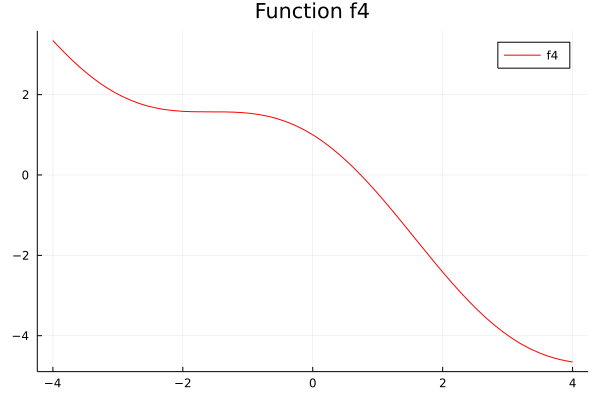

In [22]:
from = -4
to = 4
plot(f4, from, to, title="Function f4", label = "f4", color = "red")

In [23]:
bisection = find_zero(f4,(from, to), Bisection(),verbose=true)
newton = find_zero((f4, D(f4)), from, Roots.Newton(),verbose=true)
secant = find_zero(f4, from, Roots.Secant(), verbose = true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Bisection()
* iterations: 60
* function evaluations ≈ 63
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 4 )
(a₁, b₁) = ( 2.237502219360062e-154, 4 )
(a₂, b₂) = ( 3.0226589942830556e-77, 4 )
(a₃, b₃) = ( 1.1020259538958945e-38, 4 )
(a₄, b₄) = ( 2.1006417091906648e-19, 4 )
(a₅, b₅) = ( 9.1677065938711166e-10, 4 )
(a₆, b₆) = ( 6.0558319091796875e-05, 4 )
(a₇, b₇) = ( 0.01556396484375, 4 )
(a₈, b₈) = ( 0.24951171875, 4 )
(a₉, b₉) = ( 0.24951171875, 0.9990234375 )
(a₁₀, b₁₀) = ( 0.499267578125, 0.9990234375 )
(a₁₁, b₁₁) = ( 0.499267578125, 0.748779296875 )
(a₁₂, b₁₂) = ( 0.6236572265625, 0.748779296875 )
(a₁₃, b₁₃) = ( 0.68621826171875, 0.748779296875 )
(a₁₄, b₁₄) = ( 0.717498779296875, 0.748779296875 )
(a₁₅, b₁₅) = ( 0.7331390380859375, 0.748779296875 )
(a₁₆, b₁₆) = ( 0.7331390380859375, 0.74095916748046875 )
(a₁₇, b₁₇) = ( 0.73704910278320312, 0.74095916748046875 )
(a₁₈, b₁₈) = ( 0.73900413513183594, 0.7

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Newton()
* iterations: 9
* function evaluations ≈ 18
* stopped as f(x_n) = 0

Trace:
x₁ = -4,	 fx₁ = 3.3463563791363882
x₂ = -2.0952005771429381,	 fx₂ = 1.5945031778203669
x₃ = 9.7706387144593236,	 fx₃ = -10.711422714443987
x₄ = -6.434398261835593,	 fx₄ = 7.4229873507684303
x₅ = 2.3050811697064297,	 fx₅ = -2.9751376283820385
x₆ = 0.59749905668145931,	 fx₆ = 0.22924611445812837
x₇ = 0.74420937834807366,	 fx₇ = -0.0085856865751484657
x₈ = 0.73909089998938926,	 fx₈ = -9.6513550079668775e-06
x₉ = 0.73908513322250369,	 fx₉ = -1.2289391726483245e-11
x₁₀ = 0.73908513321516067,	 fx₁₀ = 0



Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Secant()
* iterations: 10
* function evaluations ≈ 12
* stopped as f(x_n) = 0

Trace:
x₁ = -3.9999939443988737,	 fx₁ = 3.3463457406532036
x₂ = -4,	 fx₂ = 3.3463563791363882
x₃ = -2.0951984313063852,	 fx₃ = 1.5945028894691227
x₄ = -0.361485182418116,	 fx₄ = 1.2968577826058869
x₅ = 7.1924085916891514,	 fx₅ = -6.5780498076100162
x₆ = 0.88250731117006342,	 fx₆ = -0.2472906499060622
x₇ = 0.63603140683814452,	 fx₇ = 0.16842805418162765
x₈ = 0.73589089490324122,	 fx₈ = 0.0053421415057897104
x₉ = 0.73916195312762523,	 fx₉ = -0.00012856891031176598
x₁₀ = 0.73908507894502595,	 fx₁₀ = 9.0827149135108698e-08
x₁₁ = 0.73908513321424008,	 fx₁₁ = 1.5406564912723297e-12
x₁₂ = 0.73908513321516067,	 fx₁₂ = 0



0.7390851332151607

In [24]:
root = bisection
if(root != NaN)
    println("BISECTION:")
    println("root is: ",root)
    println("f4(x): ",f4(root))
    println("iszero: ",iszero(f4(root)))
    println("sign(f4(prevfloat(root))) * sign(f4(nextfloat(root))): ", sign(f4(prevfloat(root))) * sign(f4(nextfloat(root))))
end    

println()

root = newton
if(root != NaN)
    println("NEWTON:")
    println("root is: ",root)
    println("f4(x): ",f4(root))
    println("iszero: ",iszero(f4(root)))
    println("sign(f4(prevfloat(root))) * sign(f4(nextfloat(root))): ", sign(f4(prevfloat(root))) * sign(f4(nextfloat(root))))
end        
        
println()

root = secant
if(root != NaN)
    println("SECANT:")
    println("root is: ",root)
    println("f4(x): ",f4(root))
    println("iszero: ",iszero(f4(root)))
    println("sign(f4(prevfloat(root))) * sign(f4(nextfloat(root))): ", sign(f4(prevfloat(root))) * sign(f4(nextfloat(root))))
end  

BISECTION:
root is: 0.7390851332151607
f4(x): 0.0
iszero: true
sign(f4(prevfloat(root))) * sign(f4(nextfloat(root))): -1.0

NEWTON:
root is: 0.7390851332151607
f4(x): 0.0
iszero: true
sign(f4(prevfloat(root))) * sign(f4(nextfloat(root))): -1.0

SECANT:
root is: 0.7390851332151607
f4(x): 0.0
iszero: true
sign(f4(prevfloat(root))) * sign(f4(nextfloat(root))): -1.0


In [25]:
push!(data_frame, ["f4", "Bisection", 60 , 63, 0.7390851332151607, 0.0, true, -1.0])
push!(data_frame, ["f4", "Newton", 9 , 18, 0.7390851332151607, 0.0, true, -1.0])
push!(data_frame, ["f4", "Secant", 10 , 12, 0.7390851332151607, 0.0, true, -1.0])

,func,method,no_iterations,no_func_evals,res_x,res_y,is_zero
,String,String,Int64,Int64,Float64,Float64,Bool
1,f2,Bisection,61,64,0.351734,0.0,1
2,f2,Newton,5,10,0.351734,0.0,1
3,f2,Secant,6,8,0.351734,-1.11022e-16,0
4,f1,Bisection,0,3,0.0,0.0,1
5,f1,Newton,6,12,-1.89549,0.0,1
6,f1,Secant,8,10,-1.89549,0.0,1
7,f3,Bisection,0,3,0.0,0.0,1
8,f3,Newton,4,8,-4.49848e-171,-4.49848e-17,0
9,f3,Secant,6,8,-3.50801e-22,-3.50801e-22,0


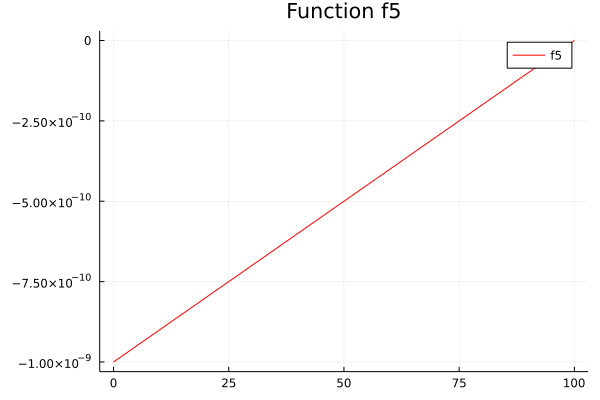

In [26]:
from = 0
to = 100
plot(f5, from, to, title="Function f5", label = "f5", color = "red")

In [27]:
bisection = find_zero(f5,(from, to), Bisection(),verbose=true)
newton = find_zero((f5, D(f5)), from, Roots.Newton(),verbose=true)
secant = find_zero(f5, from, Roots.Secant(), verbose = true)  

Results of univariate zero finding:

* Converged to: 100.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 100 )



Results of univariate zero finding:

* Converged to: 99.99999999999999
* Algorithm: Roots.Newton()
* iterations: 1
* function evaluations ≈ 2
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = -9.9999999999999986e-10
x₂ = 99.999999999999986,	 fx₂ = -1.4210854715202003e-25



Results of univariate zero finding:

* Converged to: 100.00000016390297
* Algorithm: Secant()
* iterations: 1
* function evaluations ≈ 3
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = -9.9999993944545543e-10
x₂ = 0,	 fx₂ = -9.9999999999999986e-10
x₃ = 100.00000016390297,	 fx₃ = 1.6390296764257071e-18



100.00000016390297

In [28]:
root = bisection
if(root != NaN)
    println("BISECTION:")
    println("root is: ",root)
    println("f5(x): ",f5(root))
    println("iszero: ",iszero(f5(root)))
    println("sign(f5(prevfloat(root))) * sign(f5(nextfloat(root))): ", sign(f5(prevfloat(root))) * sign(f5(nextfloat(root))))
end    

println()

root = newton
if(root != NaN)
    println("NEWTON:")
    println("root is: ",root)
    println("f5(x): ",f5(root))
    println("iszero: ",iszero(f5(root)))
    println("sign(f5(prevfloat(root))) * sign(f5(nextfloat(root))): ", sign(f5(prevfloat(root))) * sign(f5(nextfloat(root))))
end        
        
println()

root = secant
if(root != NaN)
    println("SECANT:")
    println("root is: ",root)
    println("f5(x): ",f5(root))
    println("iszero: ",iszero(f5(root)))
    println("sign(f5(prevfloat(root))) * sign(f5(nextfloat(root))): ", sign(f5(prevfloat(root))) * sign(f5(nextfloat(root))))
end  

BISECTION:
root is: 100.0
f5(x): 0.0
iszero: true
sign(f5(prevfloat(root))) * sign(f5(nextfloat(root))): -1.0

NEWTON:
root is: 99.99999999999999
f5(x): -1.4210854715202003e-25
iszero: false
sign(f5(prevfloat(root))) * sign(f5(nextfloat(root))): -0.0

SECANT:
root is: 100.00000016390297
f5(x): 1.6390296764257071e-18
iszero: false
sign(f5(prevfloat(root))) * sign(f5(nextfloat(root))): 1.0


In [29]:
push!(data_frame, ["f5", "Bisection", 0 , 3, 100.0, 0.0, true, -1.0])
push!(data_frame, ["f5", "Newton", 1 , 2, 99.99999999999999, -1.4210854715202003e-25, false, -0.0])
push!(data_frame, ["f5", "Secant", 1 , 3, 100.00000016390297, 1.6390296764257071e-18, false, 1.0])

,func,method,no_iterations,no_func_evals,res_x,res_y,is_zero
,String,String,Int64,Int64,Float64,Float64,Bool
1,f2,Bisection,61,64,0.351734,0.0,1
2,f2,Newton,5,10,0.351734,0.0,1
3,f2,Secant,6,8,0.351734,-1.11022e-16,0
4,f1,Bisection,0,3,0.0,0.0,1
5,f1,Newton,6,12,-1.89549,0.0,1
6,f1,Secant,8,10,-1.89549,0.0,1
7,f3,Bisection,0,3,0.0,0.0,1
8,f3,Newton,4,8,-4.49848e-171,-4.49848e-17,0
9,f3,Secant,6,8,-3.50801e-22,-3.50801e-22,0


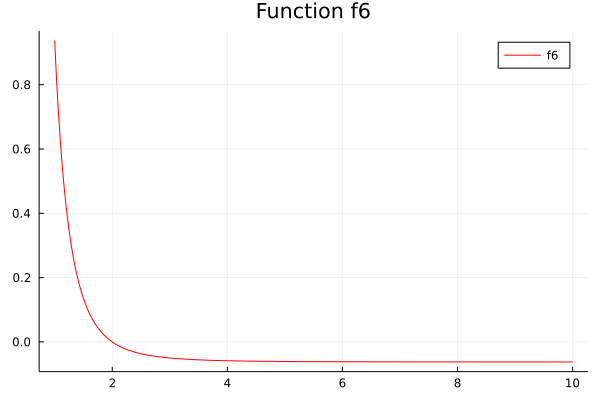

In [30]:
from = 1
to = 10
plot(f6, from, to, title="Function f6", label = "f6", color = "red")

In [31]:
bisection = find_zero(f6,(from, to), Bisection(),verbose=true)
newton = find_zero((f6, D(f6)), from, Roots.Newton(),verbose=true)
secant = find_zero(f6, from, Roots.Secant(), verbose = true)  

Results of univariate zero finding:

* Converged to: 2.0
* Algorithm: Bisection()
* iterations: 51
* function evaluations ≈ 54
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 1, 3.25 )
(a₁, b₁) = ( 1.8125, 3.25 )
(a₂, b₂) = ( 1.8125, 2.4375 )
(a₃, b₃) = ( 1.8125, 2.03125 )
(a₄, b₄) = ( 1.9140625, 2.03125 )
(a₅, b₅) = ( 1.96484375, 2.03125 )
(a₆, b₆) = ( 1.990234375, 2.03125 )
(a₇, b₇) = ( 1.990234375, 2.005859375 )
(a₈, b₈) = ( 1.99658203125, 2.005859375 )
(a₉, b₉) = ( 1.999755859375, 2.005859375 )
(a₁₀, b₁₀) = ( 1.999755859375, 2.002685546875 )
(a₁₁, b₁₁) = ( 1.999755859375, 2.0010986328125 )
(a₁₂, b₁₂) = ( 1.999755859375, 2.00030517578125 )
(a₁₃, b₁₃) = ( 1.9999542236328125, 2.00030517578125 )
(a₁₄, b₁₄) = ( 1.9999542236328125, 2.0001068115234375 )
(a₁₅, b₁₅) = ( 1.9999542236328125, 2.0000076293945312 )
(a₁₆, b₁₆) = ( 1.9999790191650391, 2.0000076293945312 )
(a₁₇, b₁₇) = ( 1.9999914169311523, 2.0000076293945312 )
(a₁₈, b₁₈) = ( 1.999997615814209, 2.0000076293945312 )
(a₁₉, b₁₉) = ( 1.99

Results of univariate zero finding:

* Converged to: 2.0
* Algorithm: Roots.Newton()
* iterations: 8
* function evaluations ≈ 16
* stopped as f(x_n) = 0

Trace:
x₁ = 1,	 fx₁ = 0.93749941406286619
x₂ = 1.2343751373290961,	 fx₂ = 0.36823606631633177
x₃ = 1.4981918935988643,	 fx₃ = 0.1359861425708388
x₄ = 1.7548009433245944,	 fx₄ = 0.042960190515557578
x₅ = 1.9335095807793856,	 fx₅ = 0.0090508313097671586
x₆ = 1.9946544672666979,	 fx₆ = 0.000672680343981948
x₇ = 1.9999643769414055,	 fx₇ = 4.4530804390277603e-06
x₈ = 1.9999999984137755,	 fx₈ = 1.9827805352067113e-10
x₉ = 2,	 fx₉ = 0



Results of univariate zero finding:

* Converged to: 1.9999999999999998
* Algorithm: Secant()
* iterations: 11
* function evaluations ≈ 13
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 1.000006055491121,	 fx₁ = 0.93747519249439815
x₂ = 1,	 fx₂ = 0.93749941406286619
x₃ = 1.2343786854791821,	 fx₃ = 0.36823111383545148
x₄ = 1.3859865027049265,	 fx₄ = 0.20849666079742712
x₅ = 1.5838757059491995,	 fx₅ = 0.096396958334061644
x₆ = 1.7540449112254839,	 fx₆ = 0.04314213077755167
x₇ = 1.8919002465103705,	 fx₇ = 0.015556138145337994
x₈ = 1.9696388535039553,	 fx₈ = 0.0039436662851578281
x₉ = 1.9960393586803769,	 fx₉ = 0.00049754093051478804
x₁₀ = 1.999850982042783,	 fx₁₀ = 1.8630714183702167e-05
x₁₁ = 1.9999992630002972,	 fx₁₁ = 9.2125044121721533e-08
x₁₂ = 1.9999999998627225,	 fx₁₂ = 1.715968966974417e-11
x₁₃ = 1.9999999999999998,	 fx₁₃ = 2.7755574531426799e-17



1.9999999999999998

In [32]:
root = bisection
if(root != NaN)
    println("BISECTION:")
    println("root is: ",root)
    println("f6(x): ",f6(root))
    println("iszero: ",iszero(f6(root)))
    println("sign(f6(prevfloat(root))) * sign(f6(nextfloat(root))): ", sign(f6(prevfloat(root))) * sign(f6(nextfloat(root))))
end    

println()

root = newton
if(root != NaN)
    println("NEWTON:")
    println("root is: ",root)
    println("f6(x): ",f6(root))
    println("iszero: ",iszero(f6(root)))
    println("sign(f6(prevfloat(root))) * sign(f6(nextfloat(root))): ", sign(f6(prevfloat(root))) * sign(f6(nextfloat(root))))
end        
        
println()

root = secant
if(root != NaN)
    println("SECANT:")
    println("root is: ",root)
    println("f6(x): ",f6(root))
    println("iszero: ",iszero(f6(root)))
    println("sign(f6(prevfloat(root))) * sign(f6(nextfloat(root))): ", sign(f6(prevfloat(root))) * sign(f6(nextfloat(root))))
end  

BISECTION:
root is: 2.0
f6(x): 0.0
iszero: true
sign(f6(prevfloat(root))) * sign(f6(nextfloat(root))): -1.0

NEWTON:
root is: 2.0
f6(x): 0.0
iszero: true
sign(f6(prevfloat(root))) * sign(f6(nextfloat(root))): -1.0

SECANT:
root is: 1.9999999999999998
f6(x): 2.77555745314268e-17
iszero: false
sign(f6(prevfloat(root))) * sign(f6(nextfloat(root))): 0.0


In [33]:
push!(data_frame, ["f6", "Bisection", 51 , 54, 2.0, 0.0, true, -1.0])
push!(data_frame, ["f6", "Newton", 8 , 16, 2.0, 0.0, true, -1.0])
push!(data_frame, ["f6", "Secant", 11 , 13, 1.9999999999999998, 2.77555745314268e-17, false, 0.0])

,func,method,no_iterations,no_func_evals,res_x,res_y,is_zero
,String,String,Int64,Int64,Float64,Float64,Bool
1,f2,Bisection,61,64,0.351734,0.0,1
2,f2,Newton,5,10,0.351734,0.0,1
3,f2,Secant,6,8,0.351734,-1.11022e-16,0
4,f1,Bisection,0,3,0.0,0.0,1
5,f1,Newton,6,12,-1.89549,0.0,1
6,f1,Secant,8,10,-1.89549,0.0,1
7,f3,Bisection,0,3,0.0,0.0,1
8,f3,Newton,4,8,-4.49848e-171,-4.49848e-17,0
9,f3,Secant,6,8,-3.50801e-22,-3.50801e-22,0


## 2.

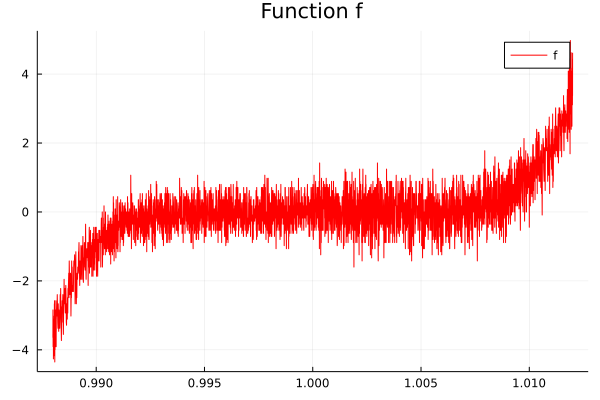

In [34]:
f(x) = 10.0^14 * (1.0 * x^7 -  7.0 * x^6 + 21.0 * x^5- 35.0 * x^4 + 35.0 * x^3 - 21.0 * x^2 +  7.0 * x -  1.0 )
from = 0.988
to = 1.012
plot(f, from, to, title="Function f", label = "f", color = "red")

### Metoda Bisekcji

In [35]:
root = find_zero(f,(from, to), Bisection(),verbose=true)
println("BISECTION:")
println("root is: ",root)
println("f(x): ",f(root))
println("iszero: ",iszero(f(root)))
println("sign(f(prevfloat(root))) * sign(f(nextfloat(root))): ", sign(f(prevfloat(root))) * sign(f(nextfloat(root))))

Results of univariate zero finding:

* Converged to: 0.9998124999999999
* Algorithm: Bisection()
* iterations: 4
* function evaluations ≈ 7
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0.997, 1.012 )
(a₁, b₁) = ( 0.997, 1.0029999999999999 )
(a₂, b₂) = ( 0.99924999999999997, 1.0029999999999999 )
(a₃, b₃) = ( 0.99924999999999997, 1.0007499999999998 )
(a₄, b₄) = ( 0.99981249999999988, 1.0007499999999998 )



BISECTION:
root is: 0.9998124999999999
f(x): 0.0
iszero: true
sign(f(prevfloat(root))) * sign(f(nextfloat(root))): 1.0


### Metoda Newtona

In [37]:
root = find_zero((f, D(f)), from, Roots.Newton(),verbose=true)
println("NEWTON:")
println("root is: ",root)
println("f(x): ",f(root))
println("iszero: ",iszero(f(root)))
println("sign(f(prevfloat(root))) * sign(f(nextfloat(root))): ", sign(f(prevfloat(root))) * sign(f(nextfloat(root))))

Results of univariate zero finding:

* Converged to: 0.9945479978319136
* Algorithm: Roots.Newton()
* iterations: 3
* function evaluations ≈ 6
* stopped as f(x_n) = 0

Trace:
x₁ = 0.98799999999999999,	 fx₁ = -3.5527136788005009
x₂ = 0.98969894665307512,	 fx₂ = -1.5099033134902129
x₃ = 0.99150745729137302,	 fx₃ = -0.79936057773011271
x₄ = 0.99454799783191361,	 fx₄ = 0



NEWTON:
root is: 0.9945479978319136
f(x): 0.0
iszero: true
sign(f(prevfloat(root))) * sign(f(nextfloat(root))): 1.0


### Metoda siecznych

In [38]:
root = find_zero(f, from, Roots.Secant(), verbose = true)  
println("SECANT:")
println("root is: ",root)
println("f(x): ",f(root))
println("iszero: ",iszero(f(root)))
println("sign(f(prevfloat(root))) * sign(f(nextfloat(root))): ", sign(f(prevfloat(root))) * sign(f(nextfloat(root))))

Results of univariate zero finding:

* Converged to: 0.9916332944085338
* Algorithm: Secant()
* iterations: 5
* function evaluations ≈ 7
* stopped as f(x_n) = 0

Trace:
x₁ = 0.98800605549068088,	 fx₁ = -4.0856207306205761
x₂ = 0.98799999999999999,	 fx₂ = -3.5527136788005009
x₃ = 0.98795963006212739,	 fx₃ = -3.730349362740526
x₄ = 0.98880739875745194,	 fx₄ = -2.1316282072803006
x₅ = 0.98993775701788467,	 fx₅ = -1.0658141036401503
x₆ = 0.9910681152783174,	 fx₆ = -0.35527136788005009
x₇ = 0.99163329440853376,	 fx₇ = 0



SECANT:
root is: 0.9916332944085338
f(x): 0.0
iszero: true
sign(f(prevfloat(root))) * sign(f(nextfloat(root))): 1.0


## 3.

### Metoda Bisekcji

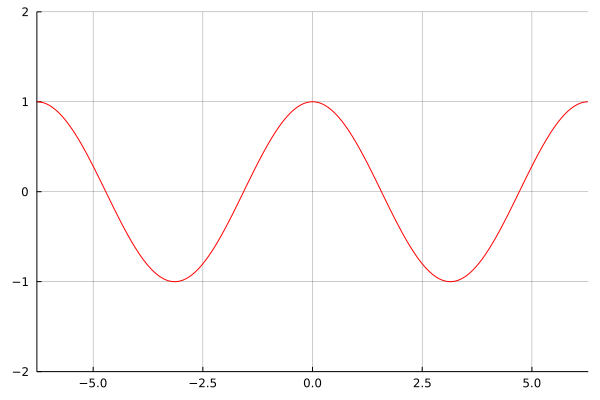

In [41]:
range = -2*pi:0.01:2*pi
f(x) = cos(x)

plot(range, f , xlims=(-2*pi, 2*pi), ylims=(-2, 2), color="red", label="", grid=true, gridalpha=0.4)

In [42]:
find_zero(f,(-2*pi, 2*pi), Bisection(),verbose=true)

LoadError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



#### Metoda niedziała ponieważ wartości funkcji na krańcach przedziału oraz w jego środku są tego samego znaku

### Metoda Newtona

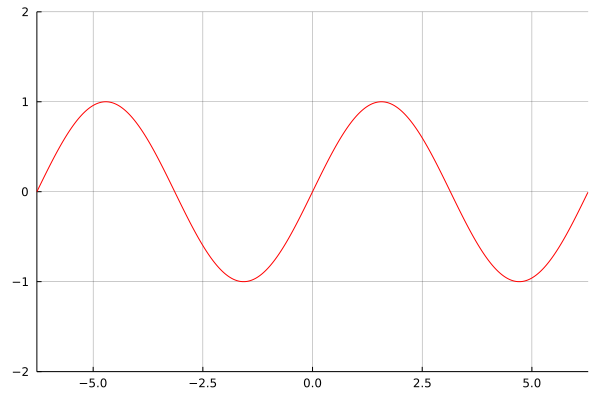

In [49]:
f(x) = sin(x)
plot(range, f , xlims=(-2*pi, 2*pi), ylims=(-2, 2), color="red", label="", grid=true, gridalpha=0.4)

In [51]:
root = find_zero((f, D(f)), pi/2, Roots.Newton(),verbose=true)
println("NEWTON:")
println("root is: ",root)
println("f(x): ",f(root))
println("iszero: ",iszero(f(root)))
println("sign(f(prevfloat(root))) * sign(f(nextfloat(root))): ", sign(f(prevfloat(root))) * sign(f(nextfloat(root))))

Results of univariate zero finding:

* Converged to: -1.6331239353195368e16
* Algorithm: Roots.Newton()
* iterations: 1
* function evaluations ≈ 2
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 1.5707963267948966,	 fx₁ = 1
x₂ = -16331239353195368,	 fx₂ = -0.65759023903134861



NEWTON:
root is: -1.6331239353195368e16
f(x): -0.6575902390313486
iszero: false
sign(f(prevfloat(root))) * sign(f(nextfloat(root))): -1.0


$x1 = \frac{pi}{2}$ \
$f(x) = sin(x)$ \
$f'(x) = cos(x)$
$x2 = x1 - \frac{f(x1)}{f'(x1)}$ \
ale $f'(x1) = cos(\frac{pi}{2}) = 0$ \
a to jest niezdefiniowane co powoduje błąd

### Metoda Siecznych

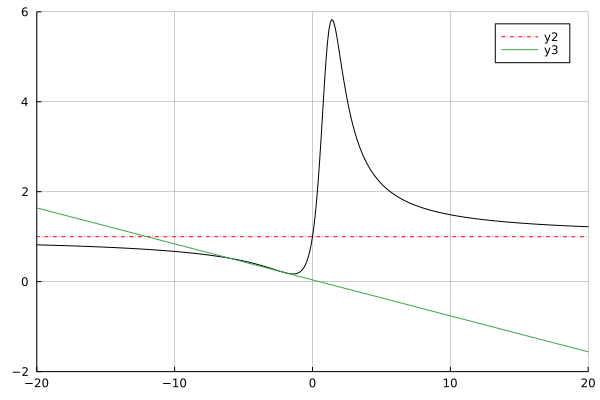

In [56]:
f_range = -25:0.1:25
f(x) = (x^2 + 2x + 2)/(x^2 - 2x + 2)
from = -2
plot(f_range, f, xlims=(-20, 20), ylims=(-2, 6), color = "black", label = "",grid = true, gridalpha = 0.4)
plot!(range, x -> 1, line =:dashdot, color="red", labal="asymptota y = 1")
plot!(range, x -> D(f)(from)*x + f(from) - D(f)(from)*from, color="blue", label="tangent at x0")

In [57]:
find_zero(f, from, verbose = true)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Secant()

Trace:
x₁ = -1.9999939444722106,	 fx₁ = 0.19999951555895026
x₂ = -2,	 fx₂ = 0.20000000000000001
x₃ = -1.9993944472210572,	 fx₃ = 0.19995156751793952
x₄ = -1.9388391693267764,	 fx₄ = 0.19523324518726415
x₅ = -1.8830022297196667,	 fx₅ = 0.19112434709606699
x₆ = -1.8412928307256533,	 fx₆ = 0.18822704606435364
x₇ = -1.8034900476901377,	 fx₇ = 0.18574251052962051
x₈ = -1.770120539853941,	 fx₈ = 0.18367131976851178
x₉ = -1.7376604672358098,	 fx₉ = 0.18177540633714287



LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

# B

```Python
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = ['b', 'r', 'g', 'y']

TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000):
    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):
    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        cmap = 'hsv'
    else:
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()

f = lambda z: z**4 - 1
fprime = lambda z: 4*z**3

plot_newton_fractal(f, fprime, n=500)
```
![ss](https://drive.google.com/uc?export=view&id=1bAQySOWPc-jVlmBgUkGccUBGCOnor190)
![ss](https://drive.google.com/uc?export=view&id=1e-hu-TWj1g25fLe4VKJUGr0ZqY3j1wZO)